In [1]:
import pandas as pd
import numpy as np

/var/folders/sp/pv6m55cn0cnf_540z_5jtfgr0000gn/T/ipykernel_2683/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


757228
['DEUTSCHLAND']
757007
3112
3105
3112


/Users/frederikpanse/Desktop/db_project/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
/Users/frederikpanse/Desktop/db_project/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/Users/frederikpanse/Desktop/db_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/frederikpanse/Desktop/db_project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


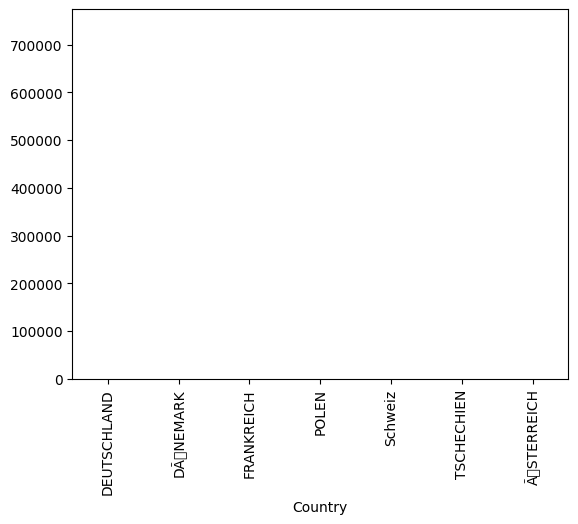

In [2]:
from ipynb.fs.full.exploration_cleaning import get_data
data = get_data()

### Difference between weekday and weekend.

In [3]:
# Turn strings in to pandas date.
data['Date'] = pd.to_datetime(data['Date'], yearfirst = True)
# Get the day of the week for each date.
data['dayofweek'] = data['Date'].dt.dayofweek
data.head()

/var/folders/sp/pv6m55cn0cnf_540z_5jtfgr0000gn/T/ipykernel_2683/3191454190.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], yearfirst = True)


,Station or stop,Date,Number of train rides,Minutes of delay,Name,Country,Coordinate Latitude,Coordinate Longitude,dayofweek
0,80197079,2016-03-16,39,49,KINDSBACH,DEUTSCHLAND,49.420450,7.613668,2
1,80160168,2016-11-01,12,0,NIEDERTREBRA,DEUTSCHLAND,51.065500,11.580700,1
2,80105122,2016-04-30,16,2,HAMM FELDMARK,DEUTSCHLAND,51.697611,7.787870,5
3,80190793,2016-07-31,14,0,LUDWIGSHAFEN (RHEIN) BASF,DEUTSCHLAND,49.510682,8.428922,6
4,80231464,2016-05-04,10,2,BURGKEMNITZ,DEUTSCHLAND,51.689400,12.407990,2


In [4]:
data_weekday = data.loc[data['dayofweek'].isin([0, 1, 2, 3, 4])]
data_weekend = data.loc[data['dayofweek'].isin([5, 6])]

<Axes: >

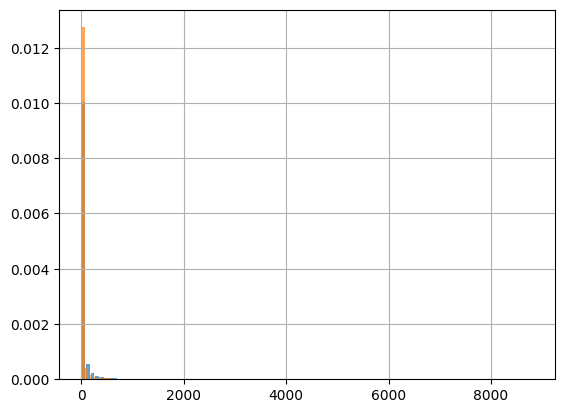

In [5]:
data_weekday["Minutes of delay"].hist(bins = 100, rwidth = 0.8, density = True, alpha = .7)
data_weekend["Minutes of delay"].hist(bins = 100, rwidth = 0.8, density = True, alpha = .7)

<Axes: >

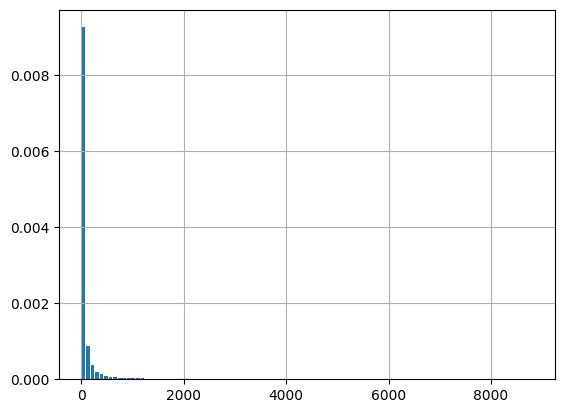

In [6]:
data_weekday[data_weekday["Minutes of delay"] != 0]["Minutes of delay"].hist(bins = 100, rwidth = 0.8, density = True)

<Axes: >

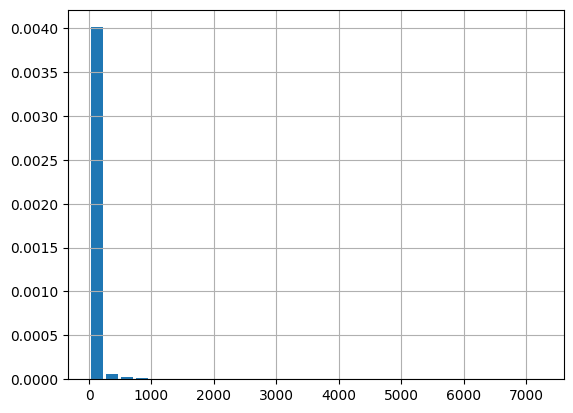

In [7]:
data_weekend["Minutes of delay"].hist(bins = 30, rwidth = 0.8, density = True)

In [8]:
data_weekday

,Station or stop,Date,Number of train rides,Minutes of delay,Name,Country,Coordinate Latitude,Coordinate Longitude,dayofweek
0,80197079,2016-03-16,39,49,KINDSBACH,DEUTSCHLAND,49.420450,7.613668,2
1,80160168,2016-11-01,12,0,NIEDERTREBRA,DEUTSCHLAND,51.065500,11.580700,1
4,80231464,2016-05-04,10,2,BURGKEMNITZ,DEUTSCHLAND,51.689400,12.407990,2
5,80020644,2016-10-04,34,0,HERBERTSHOFEN,DEUTSCHLAND,48.529570,10.849300,1
6,80042267,2016-04-15,43,116,HOSENA,DEUTSCHLAND,51.454332,14.017600,4
...,...,...,...,...,...,...,...,...,...
766023,80136234,2016-10-26,82,0,UELZEN,DEUTSCHLAND,52.964129,10.546461,2
766024,80100388,2016-01-29,33,2,HERNE,DEUTSCHLAND,51.542128,7.211104,4
766025,80143321,2016-05-30,40,0,KOLLMARSREUTE,DEUTSCHLAND,48.099070,7.887097,0
766026,80174508,2016-07-05,14,0,NEUKIRCHEN (B SULZBACH-ROSENBERG),DEUTSCHLAND,49.525068,11.620659,1


#### Calculate mean for every station by weekday or weekend

In [9]:
data_weekday_mean = data_weekday.groupby('Station or stop')['Minutes of delay'].mean()
data_weekend_mean = data_weekend.groupby('Station or stop')['Minutes of delay'].mean()
data_by_weekday_weekend = pd.merge(data_weekday_mean, data_weekend_mean, how = "left", on = "Station or stop", suffixes = ("_weekday", "_weekend"))
data_by_weekday_weekend

,Minutes of delay_weekday,Minutes of delay_weekend
Station or stop,,
80010561,0.000000,0.000000
80010579,11.809735,6.157895
80010587,0.000000,0.000000
80010660,436.559735,192.806452
80010694,114.602881,26.587912
...,...,...
80944025,0.000000,0.000000
80944033,0.000000,0.000000
80944348,1.936170,0.500000


In [10]:
data_by_weekday_weekend.idxmax()

Minutes of delay_weekday    80031732
Minutes of delay_weekend    80031732
dtype: int64

In [11]:
diff_weekday_weekend = (data_by_weekday_weekend["Minutes of delay_weekday"] - data_by_weekday_weekend["Minutes of delay_weekend"])
diff_weekday_weekend2 = diff_weekday_weekend.drop(diff_weekday_weekend.idxmax())

<Axes: >

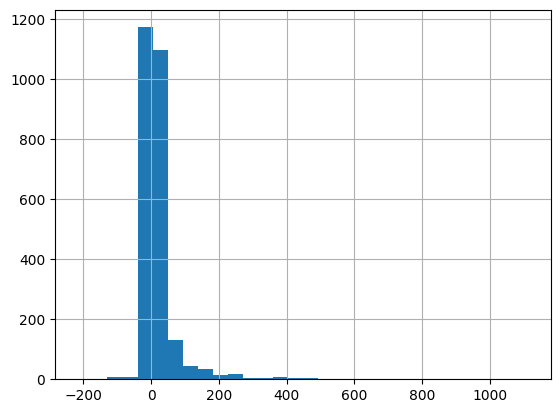

In [12]:
diff_weekday_weekend.hist(bins=30)

<Axes: >

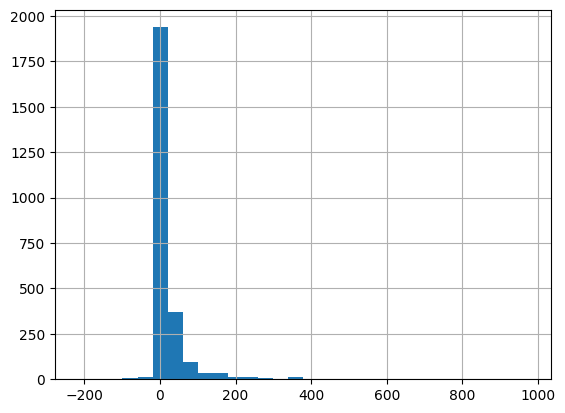

In [13]:
diff_weekday_weekend2.hist(bins=30)

In [14]:
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib import ticker
import matplotlib.pyplot as plt

TODO: Use mean over all stations of weekend / weekday

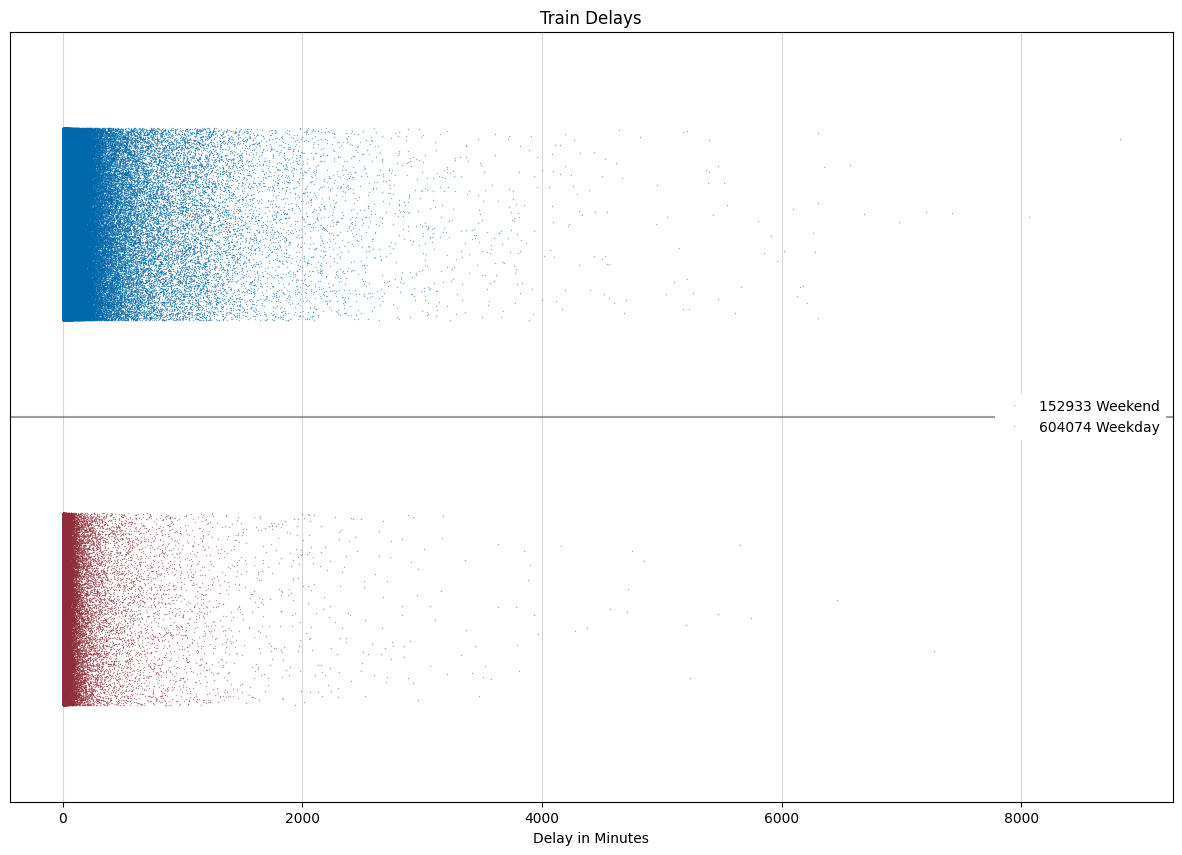

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title("Train Delays")
ax.set_xlabel("Delay in Minutes")

n_we = data_weekend.shape[0] # number of female runners
n_wd = data_weekday.shape[0] # number of male runners

np.random.seed(1)
u_we = np.random.rand(n_we)
u_wd = np.random.rand(n_wd)

ax.plot(
    data_weekend["Minutes of delay"], 0.5 * u_we, "o", label=f"{n_we} Weekend", color=rgb.tue_red, alpha=0.5, mec = "none", ms = 1
)
ax.plot(
    data_weekday["Minutes of delay"], 1 + 0.5 * u_wd, "o", label=f"{n_wd} Weekday", color=rgb.tue_blue, alpha=0.5, mec = "none", ms = 1
)


# set the x-axis formatter to the custom function
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_seconds))
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_ylim(-0.25, 1.75)

plt.show()

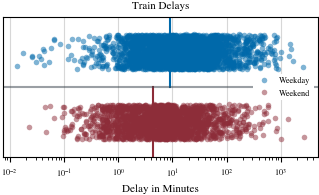

In [34]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))

fig, ax = plt.subplots()
ax.set_title("Train Delays")
ax.set_xlabel("Delay in Minutes")

N = data_by_weekday_weekend.shape[0] # number of stations

np.random.seed(1)
u_we = u_wd = np.random.rand(N)

ax.plot(
    data_by_weekday_weekend["Minutes of delay_weekday"], 1 + 0.5 * u_wd, "o", label="Weekday", color=rgb.tue_blue, alpha=0.5, mec = "none", ms = 4
)
ax.plot(
    data_by_weekday_weekend["Minutes of delay_weekend"], 0.5 * u_we, "o", label="Weekend", color=rgb.tue_red, alpha=0.5, mec = "none", ms = 4
)

ax.axvline(x=data_by_weekday_weekend["Minutes of delay_weekend"].median(), ymax = 0.5, color=rgb.tue_red)
ax.axvline(x=data_by_weekday_weekend["Minutes of delay_weekday"].median(), ymin = 0.5, color=rgb.tue_blue)

# set the x-axis formatter to the custom function
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_ylim(-0.25, 1.75)
ax.set_xscale('log')

plt.show()

In [35]:
from deutsche_bahn_frankfurt import find_route_connections

Current working directory: /Users/frederikpanse/Desktop/db_project/exp


KeyError: 'strecke_nr'

In [18]:
n_we = data_weekend.shape[0] # number of weekends
n_wd = data_weekday.shape[0] # number of weekdays

N = n_we + n_we # total number of days
Y = np.concatenate([data_weekend['Minutes of delay'].values, data_weekday['Minutes of delay'].values]) # all delay times, shape = (1, N)
X = np.bool_(np.concatenate([np.ones(n_we),np.zeros(n_wd)])) # TRUE if girl, FALSE otherwise, shape = (1, N)

In [19]:
rng = np.random.default_rng(1) # random number generator
B = 4000 # number of permuations to produce

# repeat Y (one row) B times, shape now = (B, N), then shuffle the columns
X_permuted = rng.permuted(np.tile(X, (B,1)), axis=1) 

In [20]:
def T_mean(group):
    '''How much faster is the average girl?'''
    return np.mean(Y[~group]) - np.mean(Y[group])

# the statistics for the original data
mean_true = T_mean(X)

# the statistics for the permuted data
mean_dist = np.apply_along_axis(T_mean, 1, X_permuted)

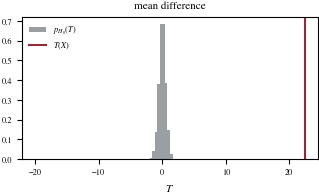

In [36]:
fig, ax = plt.subplots()

bins = np.linspace(-20, 20, 101)
ax.set_title('mean difference')
ax.hist(mean_dist, bins=bins, density=True, label='$p_{H_0}(T)$', alpha=0.5, color=rgb.tue_dark)
ax.axvline(mean_true, label='$T(X)$', alpha=1.0, color=rgb.tue_red)
ax.legend(loc='upper left', frameon=False)
#ax.yaxis.set_visible(False)
ax.set_xlabel('$T$')

plt.show()

In [22]:
bins = np.linspace(-40, 40, 101)
loc_data = np.argmax(bins >= mean_true)
histogram,_ = np.histogram(mean_dist, bins=bins, density=True)
empirical_cdf = np.cumsum(histogram) / np.sum(histogram)

p_value = empirical_cdf[loc_data]
print(p_value)

1.0000000000000002


In [23]:
data_weekday["Minutes of delay"].mean()

53.94466240891017

In [24]:
data_weekend["Minutes of delay"].mean()

31.541367788508694

In [25]:
Y = np.concatenate([data_weekend["Minutes of delay"].values, data_weekday["Minutes of delay"].values]) # all race times, shape = (1, N)
rng = np.random.default_rng(1) # random number generator
B = 100000 # number of permuations to produce

Text(0.5, 0, '$T$')

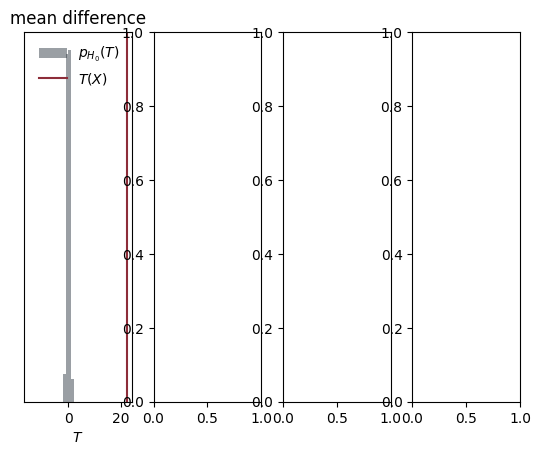

In [26]:
fig, axs = plt.subplots(1,4)

ax = axs[0]
bins = np.linspace(-15, 15, 31)
ax.set_title('mean difference')
ax.hist(mean_dist, bins=bins, density=True, label='$p_{H_0}(T)$', alpha=0.5, color=rgb.tue_dark)
ax.axvline(mean_true, label='$T(X)$', alpha=1.0, color=rgb.tue_red)
ax.legend(loc='upper right', frameon=False)
ax.yaxis.set_visible(False)
ax.set_xlabel('$T$')